In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime as dt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.deterministic import DeterministicProcess
import pmdarima as pm

from tensorflow import keras
from tensorflow.keras import layers
from keras import metrics, initializers
from tensorflow.keras.layers import Dropout,LSTM, GRU, BatchNormalization, Dense, Bidirectional, LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.image as mpimg
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Reshape

from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau

from matplotlib import style
style.use('tableau-colorblind10')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import scipy as sp
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

In [3]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [4]:
df = pd.read_csv('Data/bitcoin without lag.csv', parse_dates=['datetime'], index_col=['datetime'])
#df = pd.read_csv('Data/Bitcoin preprocessed.csv', index_col=['datetime'])
df.head()

,high,low,open,volumefrom,volumeto,close,hourly_volume,top_tier_volume_quote,top_tier_volume_base,top_tier_volume_total,cccagg_volume_quote,cccagg_volume_base,cccagg_volume_total,total_volume_quote,total_volume_base,total_volume_total,eth_open,eth_close,bnb_open,bnb_close,usdt_open,usdt_close,sol_open,sol_close,hourly_return,3_hourly_return,5_hourly_return,12_hourly_return,3_hourly_volatility,5_hourly_volatility,12_hourly_volatility,daily_volatility,trend_score,Pos_score,Neg_score,Compound_score,Polarity,time_of_the_day,day,day_of_month,weekend
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01 00:00:00,20817.65,19647.29,19908.49,6823.65,1.381081e+08,20262.66,143641.30,1.413396e+08,1.734342e+09,1.875681e+09,1.023345e+08,1.014878e+09,1.117212e+09,1.706061e+08,1.915078e+09,2.085684e+09,1069.53,1093.82,219.48,222.58,0.9992,0.9987,33.74,34.44,354.17,1464.85,1379.49,1072.73,493.599288,460.540694,348.583077,286.091957,100.0,0.090867,0.064867,0.115550,0.0,0.0,Friday,1,0
2022-07-01 01:00:00,20444.21,20231.53,20262.66,3183.32,6.471331e+07,20380.14,64012.17,6.423249e+07,8.010797e+08,8.653122e+08,4.611965e+07,4.423495e+08,4.884692e+08,8.518715e+07,8.941570e+08,9.793442e+08,1093.82,1095.07,222.58,225.22,0.9987,0.9985,34.44,34.87,117.48,1506.73,1646.43,1531.40,476.384009,411.796784,321.143744,286.846382,113.0,0.098000,0.066744,0.034856,0.0,1.0,Friday,1,0
2022-07-01 02:00:00,20504.52,20238.04,20380.14,2262.26,4.603065e+07,20266.86,48773.36,4.844529e+07,5.490071e+08,5.974524e+08,3.446238e+07,3.276693e+08,3.621317e+08,7.538542e+07,6.256688e+08,7.010542e+08,1095.07,1091.22,225.22,225.60,0.9985,0.9982,34.87,34.77,-113.28,358.37,1469.05,1165.98,233.731269,446.529586,325.557403,287.855508,92.0,0.132773,0.042909,0.103223,0.0,2.0,Friday,1,0
2022-07-01 03:00:00,20276.63,19668.22,20266.86,3603.45,7.212081e+07,19703.32,65925.93,5.869008e+07,8.222572e+08,8.809473e+08,4.438665e+07,4.956181e+08,5.400048e+08,7.742932e+07,9.239673e+08,1.001397e+09,1091.22,1053.55,225.60,220.97,0.9982,0.9980,34.77,33.61,-563.54,-559.34,829.91,583.05,346.355426,592.302312,377.555379,310.682042,90.0,0.109960,0.044840,0.166612,0.0,3.0,Friday,1,0
2022-07-01 04:00:00,19713.40,19352.87,19703.32,3932.58,7.685356e+07,19376.97,84503.60,7.795704e+07,2.074082e+09,2.152039e+09,5.267009e+07,6.085733e+08,6.612434e+08,1.007285e+08,2.285414e+09,2.386143e+09,1053.55,1048.59,220.97,219.20,0.9980,0.9981,33.61,32.55,-326.35,-1003.17,-531.52,257.76,225.237648,360.433506,392.813183,317.146276,97.0,0.093640,0.058400,0.132120,0.0,4.0,Friday,1,0


In [5]:
df = df.drop(['Pos_score', 'Neg_score'], axis = 1)

### Feature Engineering

In [6]:
df['day'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [7]:
df['day_of_week'] = 1
for i in range(len(df.index)):
    if df['day'][i] == 'Sunday':
        df['day_of_week'][i] = 1
    elif df['day'][i] == 'Monday':
        df['day_of_week'][i] = 2
    elif df['day'][i] == 'Tuesday':
        df['day_of_week'][i] = 3
    elif df['day'][i] == 'Wednesday':
        df['day_of_week'][i] = 4
    elif df['day'][i] == 'Thursday':
        df['day_of_week'][i] = 5
    elif df['day'][i] == 'Friday':
        df['day_of_week'][i] = 6
    elif df['day'][i] == 'Saturday':
        df['day_of_week'][i] = 7

In [8]:
#df.drop('day', axis = 1, inplace = True)
df['hourly_return'] = 0
for i in range(1, len(df.index)):
    df['hourly_return'][i] = df['close'][i] - df['close'][i-1]

In [9]:
df.head()

,high,low,open,volumefrom,volumeto,close,hourly_volume,top_tier_volume_quote,top_tier_volume_base,top_tier_volume_total,cccagg_volume_quote,cccagg_volume_base,cccagg_volume_total,total_volume_quote,total_volume_base,total_volume_total,eth_open,eth_close,bnb_open,bnb_close,usdt_open,usdt_close,sol_open,sol_close,hourly_return,3_hourly_return,5_hourly_return,12_hourly_return,3_hourly_volatility,5_hourly_volatility,12_hourly_volatility,daily_volatility,trend_score,Compound_score,Polarity,time_of_the_day,day,day_of_month,weekend,day_of_week
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01 00:00:00,20817.65,19647.29,19908.49,6823.65,1.381081e+08,20262.66,143641.30,1.413396e+08,1.734342e+09,1.875681e+09,1.023345e+08,1.014878e+09,1.117212e+09,1.706061e+08,1.915078e+09,2.085684e+09,1069.53,1093.82,219.48,222.58,0.9992,0.9987,33.74,34.44,0.00,1464.85,1379.49,1072.73,493.599288,460.540694,348.583077,286.091957,100.0,0.115550,0.0,0.0,Friday,1,0,6
2022-07-01 01:00:00,20444.21,20231.53,20262.66,3183.32,6.471331e+07,20380.14,64012.17,6.423249e+07,8.010797e+08,8.653122e+08,4.611965e+07,4.423495e+08,4.884692e+08,8.518715e+07,8.941570e+08,9.793442e+08,1093.82,1095.07,222.58,225.22,0.9987,0.9985,34.44,34.87,117.48,1506.73,1646.43,1531.40,476.384009,411.796784,321.143744,286.846382,113.0,0.034856,0.0,1.0,Friday,1,0,6
2022-07-01 02:00:00,20504.52,20238.04,20380.14,2262.26,4.603065e+07,20266.86,48773.36,4.844529e+07,5.490071e+08,5.974524e+08,3.446238e+07,3.276693e+08,3.621317e+08,7.538542e+07,6.256688e+08,7.010542e+08,1095.07,1091.22,225.22,225.60,0.9985,0.9982,34.87,34.77,-113.28,358.37,1469.05,1165.98,233.731269,446.529586,325.557403,287.855508,92.0,0.103223,0.0,2.0,Friday,1,0,6
2022-07-01 03:00:00,20276.63,19668.22,20266.86,3603.45,7.212081e+07,19703.32,65925.93,5.869008e+07,8.222572e+08,8.809473e+08,4.438665e+07,4.956181e+08,5.400048e+08,7.742932e+07,9.239673e+08,1.001397e+09,1091.22,1053.55,225.60,220.97,0.9982,0.9980,34.77,33.61,-563.54,-559.34,829.91,583.05,346.355426,592.302312,377.555379,310.682042,90.0,0.166612,0.0,3.0,Friday,1,0,6
2022-07-01 04:00:00,19713.40,19352.87,19703.32,3932.58,7.685356e+07,19376.97,84503.60,7.795704e+07,2.074082e+09,2.152039e+09,5.267009e+07,6.085733e+08,6.612434e+08,1.007285e+08,2.285414e+09,2.386143e+09,1053.55,1048.59,220.97,219.20,0.9980,0.9981,33.61,32.55,-326.35,-1003.17,-531.52,257.76,225.237648,360.433506,392.813183,317.146276,97.0,0.132120,0.0,4.0,Friday,1,0,6


## Univariate Methods

In [10]:
uni_df= df[['close']].reset_index(drop = True)

In [286]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Convert to sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data.index) - seq_length):
        seq = data.loc[i:i + (seq_length-1)]
        target = data.loc[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [379]:
# Convert to sequences
def sequences_to_sequences(data, seq_length, seq_length2):
    sequences = []
    targets = []
    for i in range(len(data.index) - seq_length - seq_length2):
        seq = data.loc[i:i + (seq_length-1)]
        target = data.loc[i + seq_length : i + seq_length + (seq_length2 - 1)]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [553]:
seq_length = 2  # Length of each sequence
X, y = create_sequences(uni_df, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 500, shuffle=False)

# Normalize the training data
scaler_train = RobustScaler()
X_train = scaler_train.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train = scaler_train.transform(y_train.reshape(-1, 1)).reshape(y_train.shape)

# Normalize the test data using a separate scaler
scaler_test = RobustScaler()
X_test = scaler_test.fit_transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test = scaler_test.transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

In [532]:
# seq_length = 500
# seq_length2 = 500
# X, y = sequences_to_sequences(uni_df, seq_length, seq_length2)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 500, shuffle=False)

# # Normalize the training data
# scaler_x = RobustScaler()
# X_train = scaler_x.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
# X_test = scaler_x.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# # Normalize the test data using a separate scaler
# scaler_y = RobustScaler()
# y_train = scaler_y.fit_transform(y_train.reshape(-1, y_train.shape[-1])).reshape(y_train.shape)
# y_test = scaler_y.transform(y_test.reshape(-1, y_test.shape[-1])).reshape(y_test.shape)

In [554]:
y_train.shape

(8258, 1)

In [232]:
# MAPE
import statistics
from sklearn.metrics import mean_squared_error, r2_score

def MAPE(actual, pred):
    assert len(actual) == len(pred), "Input arrays must have the same length."
    error_ = []
    for ii in range(len(actual)):
        absolute_errors = abs((actual[ii] - pred[ii]) / actual[ii])
        error_.append(absolute_errors)
    
    mape = (sum(error_)/len(error_)) * 100.0

    return mape

def rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

### Auto encoders

##### LSTM based encoder

In [555]:
# Define the autoencoder model
latent_dim = 1  # Dimensionality of the latent space

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Encoder
encoded = LSTM(latent_dim)(inputs)
encoded = RepeatVector(X_train.shape[1])(encoded)

# Decoder
decoded = LSTM(latent_dim, return_sequences=True)(encoded)
decoded = TimeDistributed(Dense(X_train.shape[2]))(decoded)

# Autoencoder model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs = 70, batch_size = 16, validation_split = 0.15,
                callbacks = [callback, REDUCE_LR])

Epoch 1/70
439/439 [==============================] - 5s 7ms/step - loss: 0.2742 - val_loss: 0.3903 - lr: 0.0010
Epoch 2/70
439/439 [==============================] - 3s 6ms/step - loss: 0.0825 - val_loss: 0.1365 - lr: 0.0010
Epoch 3/70
439/439 [==============================] - 3s 6ms/step - loss: 0.0433 - val_loss: 0.0803 - lr: 0.0010
Epoch 4/70
439/439 [==============================] - 3s 7ms/step - loss: 0.0239 - val_loss: 0.0352 - lr: 0.0010
Epoch 5/70
439/439 [==============================] - 3s 6ms/step - loss: 0.0126 - val_loss: 0.0138 - lr: 0.0010
Epoch 6/70
439/439 [==============================] - 3s 6ms/step - loss: 0.0074 - val_loss: 0.0073 - lr: 0.0010
Epoch 7/70
439/439 [==============================] - 3s 6ms/step - loss: 0.0048 - val_loss: 0.0046 - lr: 0.0010
Epoch 8/70
439/439 [==============================] - 3s 6ms/step - loss: 0.0034 - val_loss: 0.0030 - lr: 0.0010
Epoch 9/70
439/439 [==============================] - 3s 6ms/step - loss: 0.0024 - val_loss: 0.0

In [557]:
# Extract the encoder part
encoder = Model(inputs, encoded)

# Generate the compressed representation of the input
encoded_X_train = encoder.predict(X_train)
encoded_X_test = encoder.predict(X_test)

# Build a simple model for forecasting based on the encoded features
forecast_input = Input(shape=(encoded_X_train.shape[1], encoded_X_train.shape[2]))
forecast_output = Dense(1)(forecast_input)

forecast_model = Model(forecast_input, forecast_output)
forecast_model.compile(optimizer='adam', loss='mse')

# Train the forecasting model
forecast_model.fit(encoded_X_train, y_train, epochs = 70, batch_size = 16, validation_split = 0.15,
                   callbacks = [callback, REDUCE_LR])

# Make predictions
y_pred = forecast_model.predict(encoded_X_test)

16/16 [==============================] - 0s 1ms/step
Epoch 1/70
439/439 [==============================] - 2s 3ms/step - loss: 0.1417 - val_loss: 0.2382 - lr: 0.0010
Epoch 2/70
439/439 [==============================] - 1s 3ms/step - loss: 0.0753 - val_loss: 0.1738 - lr: 0.0010
Epoch 3/70
439/439 [==============================] - 1s 3ms/step - loss: 0.0463 - val_loss: 0.1145 - lr: 0.0010
Epoch 4/70
439/439 [==============================] - 1s 3ms/step - loss: 0.0280 - val_loss: 0.0716 - lr: 0.0010
Epoch 5/70
439/439 [==============================] - 1s 3ms/step - loss: 0.0160 - val_loss: 0.0414 - lr: 0.0010
Epoch 6/70
439/439 [==============================] - 1s 3ms/step - loss: 0.0085 - val_loss: 0.0206 - lr: 0.0010
Epoch 7/70
439/439 [==============================] - 1s 3ms/step - loss: 0.0042 - val_loss: 0.0090 - lr: 0.0010
Epoch 8/70
439/439 [==============================] - 1s 3ms/step - loss: 0.0021 - val_loss: 0.0042 - lr: 0.0010
Epoch 9/70
439/439 [=======================

In [558]:
y_pred = [x[0] for x in y_pred]
y_pred = np.array(y_pred)

In [559]:
# Inverse transform the predictions and the true values using the test scaler
y_pred = scaler_test.inverse_transform(y_pred)
y_test_original = scaler_test.inverse_transform(y_test)

In [560]:
rmse_error = rmse(y_test_original, y_pred)
mape_error = MAPE(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

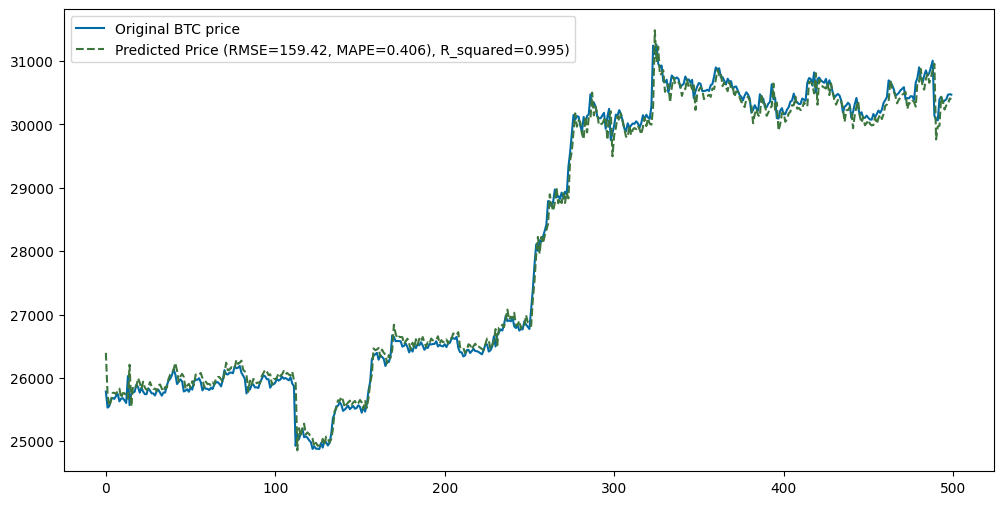

In [561]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original, label = 'Original BTC price');
ax.plot(y_pred, linestyle='--', color='#3c763d',
         label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}), R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

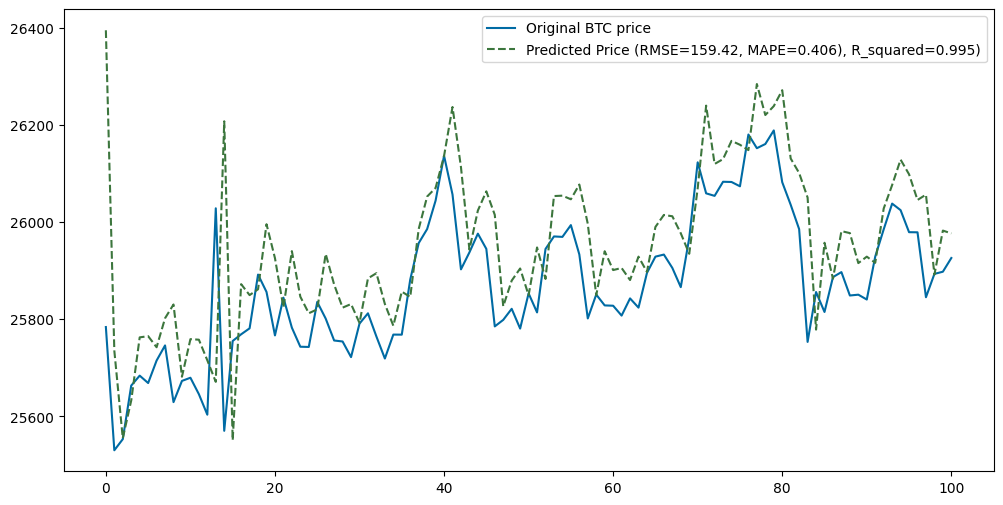

In [562]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(y_pred[0:101], linestyle='--', color='#3c763d',
         label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}), R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

##### Bidirectional LSTM

In [312]:
# Define the autoencoder model
latent_dim = 1  # Dimensionality of the latent space

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Encoder
encoded = Bidirectional(LSTM(latent_dim, return_sequences=False))(inputs)
encoded = Dense(latent_dim, activation='relu')(encoded)
encoded = RepeatVector(X_train.shape[1])(encoded)

# Decoder
decoded = Bidirectional(LSTM(latent_dim, return_sequences=True))(encoded)
decoded = TimeDistributed(Dense(X_train.shape[2]))(decoded)

# Autoencoder model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs = 50, batch_size=32, validation_split = 0.15, callbacks = [callback, REDUCE_LR])

Epoch 1/50
220/220 [==============================] - 7s 15ms/step - loss: 0.3115 - val_loss: 0.9210 - lr: 0.0010
Epoch 2/50
220/220 [==============================] - 2s 11ms/step - loss: 0.1512 - val_loss: 0.3614 - lr: 0.0010
Epoch 3/50
220/220 [==============================] - 2s 11ms/step - loss: 0.0511 - val_loss: 0.0939 - lr: 0.0010
Epoch 4/50
220/220 [==============================] - 2s 11ms/step - loss: 0.0220 - val_loss: 0.0293 - lr: 0.0010
Epoch 5/50
220/220 [==============================] - 2s 11ms/step - loss: 0.0118 - val_loss: 0.0124 - lr: 0.0010
Epoch 6/50
220/220 [==============================] - 2s 11ms/step - loss: 0.0071 - val_loss: 0.0067 - lr: 0.0010
Epoch 7/50
220/220 [==============================] - 2s 11ms/step - loss: 0.0047 - val_loss: 0.0048 - lr: 0.0010
Epoch 8/50
220/220 [==============================] - 2s 11ms/step - loss: 0.0033 - val_loss: 0.0032 - lr: 0.0010
Epoch 9/50
220/220 [==============================] - 2s 11ms/step - loss: 0.0024 - val_

In [313]:
# Extract the encoder part
encoder = Model(inputs, encoded)

# Generate the compressed representation of the input
encoded_X_train = encoder.predict(X_train)
encoded_X_test = encoder.predict(X_test)

# Build a simple model for forecasting based on the encoded features
forecast_input = Input(shape=(encoded_X_train.shape[1], encoded_X_train.shape[2]))
forecast_output = Dense(1)(forecast_input)

forecast_model = Model(forecast_input, forecast_output)
forecast_model.compile(optimizer='adam', loss='mse')

# Train the forecasting model
forecast_model.fit(encoded_X_train, y_train, epochs = 50, batch_size=32, validation_split=0.15,
                   callbacks = [callback, REDUCE_LR])

# Make predictions
y_pred = forecast_model.predict(encoded_X_test)

16/16 [==============================] - 0s 2ms/step
Epoch 1/50
220/220 [==============================] - 1s 3ms/step - loss: 0.6234 - val_loss: 1.4048 - lr: 0.0010
Epoch 2/50
220/220 [==============================] - 1s 3ms/step - loss: 0.3157 - val_loss: 1.0009 - lr: 0.0010
Epoch 3/50
220/220 [==============================] - 1s 3ms/step - loss: 0.2058 - val_loss: 0.7821 - lr: 0.0010
Epoch 4/50
220/220 [==============================] - 1s 3ms/step - loss: 0.1730 - val_loss: 0.6670 - lr: 0.0010
Epoch 5/50
220/220 [==============================] - 1s 3ms/step - loss: 0.1597 - val_loss: 0.6043 - lr: 0.0010
Epoch 6/50
220/220 [==============================] - 1s 3ms/step - loss: 0.1485 - val_loss: 0.5544 - lr: 0.0010
Epoch 7/50
220/220 [==============================] - 1s 3ms/step - loss: 0.1370 - val_loss: 0.5066 - lr: 0.0010
Epoch 8/50
220/220 [==============================] - 1s 3ms/step - loss: 0.1251 - val_loss: 0.4627 - lr: 0.0010
Epoch 9/50
220/220 [=======================

In [314]:
new_pred = [x[0] for x in y_pred]
new_pred = np.array(new_pred)

In [315]:
# Inverse transform the predictions and the true values using the test scaler
y_pred = scaler_test.inverse_transform(new_pred)
y_test_original = scaler_test.inverse_transform(y_test)

In [316]:
rmse_error = rmse(y_test_original, y_pred)
mape_error = MAPE(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

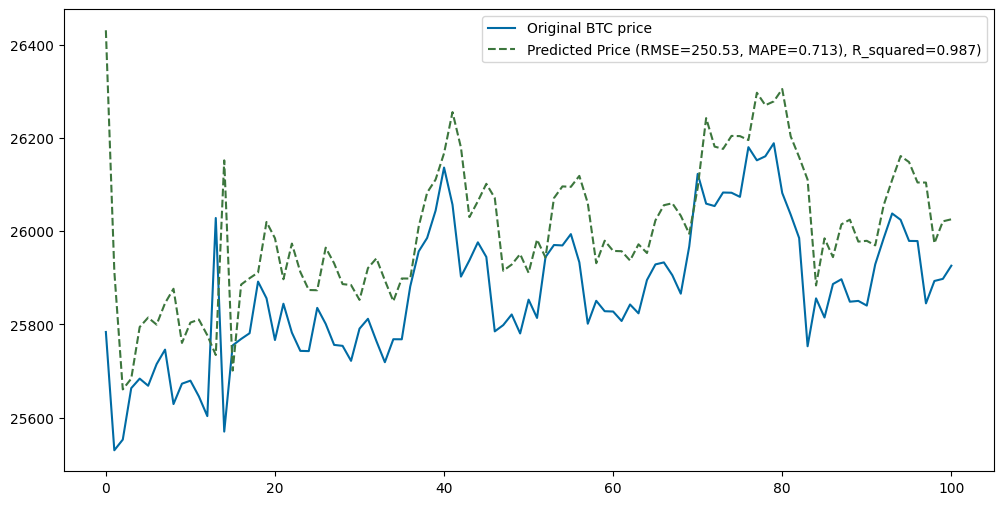

In [317]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(y_pred[0:101], linestyle='--', color='#3c763d',
         label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}), R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

##### CNN-LSTM based encoder

In [324]:
# Define the autoencoder model
latent_dim = 1  # Dimensionality of the latent space
filters = 64
kernel_size = 3

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Encoder
encoded = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same')(inputs)
encoded = LSTM(latent_dim, return_sequences=False)(encoded)
encoded = Dense(latent_dim, activation='relu')(encoded)
encoded = RepeatVector(X_train.shape[1])(encoded)

# Decoder
decoded = LSTM(latent_dim, return_sequences=True)(encoded)
decoded = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same')(decoded)
decoded = TimeDistributed(Dense(X_train.shape[2]))(decoded)

# Autoencoder model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, validation_split=0.15, callbacks = [callback, REDUCE_LR])

Epoch 1/50
439/439 [==============================] - 6s 9ms/step - loss: 0.1484 - val_loss: 0.0048 - lr: 0.0010
Epoch 2/50
439/439 [==============================] - 3s 7ms/step - loss: 6.4546e-04 - val_loss: 9.4722e-05 - lr: 0.0010
Epoch 3/50
439/439 [==============================] - 3s 7ms/step - loss: 1.5906e-04 - val_loss: 7.8320e-05 - lr: 0.0010
Epoch 4/50
439/439 [==============================] - 3s 7ms/step - loss: 5.9548e-05 - val_loss: 4.1885e-05 - lr: 0.0010
Epoch 5/50
439/439 [==============================] - 3s 7ms/step - loss: 2.5080e-05 - val_loss: 6.1844e-05 - lr: 5.0000e-04
Epoch 6/50
439/439 [==============================] - 3s 8ms/step - loss: 2.0872e-05 - val_loss: 7.2917e-05 - lr: 5.0000e-04
Epoch 7/50
439/439 [==============================] - 3s 7ms/step - loss: 1.2747e-05 - val_loss: 4.4559e-05 - lr: 2.5000e-04
Epoch 8/50
439/439 [==============================] - 3s 7ms/step - loss: 1.0817e-05 - val_loss: 4.7860e-05 - lr: 2.5000e-04
Epoch 9/50
439/439 [====

In [325]:
# Extract the encoder part
encoder = Model(inputs, encoded)

# Generate the compressed representation of the input
encoded_X_train = encoder.predict(X_train)
encoded_X_test = encoder.predict(X_test)

# Build a simple model for forecasting based on the encoded features
forecast_input = Input(shape=(encoded_X_train.shape[1], encoded_X_train.shape[2]))
forecast_output = Dense(1)(forecast_input)

forecast_model = Model(forecast_input, forecast_output)
forecast_model.compile(optimizer='adam', loss='mse')

# Train the forecasting model
forecast_model.fit(encoded_X_train, y_train, epochs=50, batch_size=16, validation_split=0.15,
                   callbacks = [callback, REDUCE_LR])

# Make predictions
y_pred = forecast_model.predict(encoded_X_test)

16/16 [==============================] - 0s 3ms/step
Epoch 1/50
439/439 [==============================] - 1s 3ms/step - loss: 0.5137 - val_loss: 1.5144 - lr: 0.0010
Epoch 2/50
439/439 [==============================] - 1s 3ms/step - loss: 0.4444 - val_loss: 1.2873 - lr: 0.0010
Epoch 3/50
439/439 [==============================] - 1s 3ms/step - loss: 0.3837 - val_loss: 1.1090 - lr: 0.0010
Epoch 4/50
439/439 [==============================] - 1s 3ms/step - loss: 0.3277 - val_loss: 0.9321 - lr: 0.0010
Epoch 5/50
439/439 [==============================] - 1s 3ms/step - loss: 0.2767 - val_loss: 0.7867 - lr: 0.0010
Epoch 6/50
439/439 [==============================] - 1s 3ms/step - loss: 0.2310 - val_loss: 0.6506 - lr: 0.0010
Epoch 7/50
439/439 [==============================] - 1s 3ms/step - loss: 0.1903 - val_loss: 0.5321 - lr: 0.0010
Epoch 8/50
439/439 [==============================] - 1s 3ms/step - loss: 0.1546 - val_loss: 0.4273 - lr: 0.0010
Epoch 9/50
439/439 [=======================

In [326]:
new_pred = [x[0] for x in y_pred]
new_pred = np.array(new_pred)

In [327]:
# Inverse transform the predictions and the true values using the test scaler
y_pred = scaler_test.inverse_transform(new_pred)
y_test_original = scaler_test.inverse_transform(y_test)

In [328]:
rmse_error = rmse(y_test_original, y_pred)
mape_error = MAPE(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

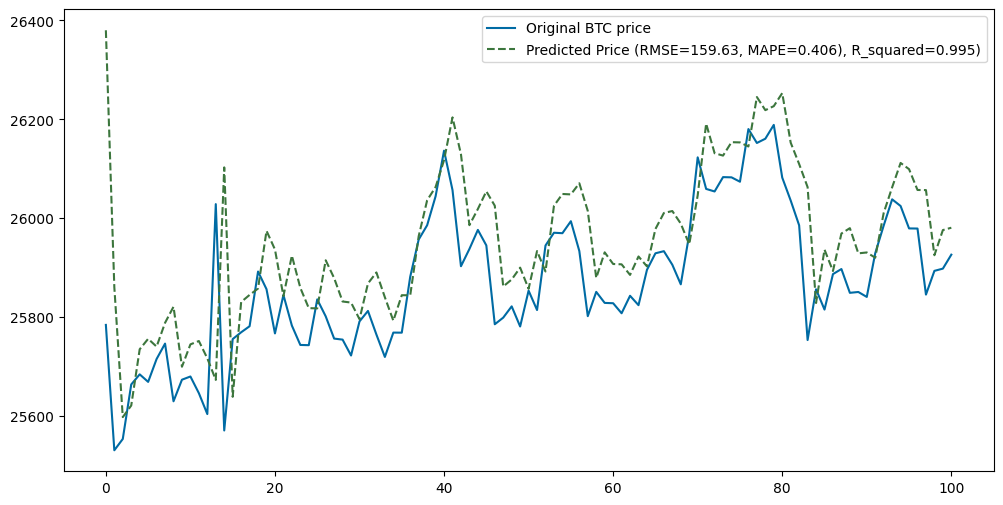

In [329]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(y_pred[0:101], linestyle='--', color='#3c763d',
         label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}), R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

### Generative adversarial networks

In [30]:
train_data = uni_df.loc[:len(df.index) - 500]
test_data = uni_df.loc[len(df.index) - 500:]

In [31]:
# Normalize the training data
from sklearn.preprocessing import RobustScaler
scaler_gan = RobustScaler()
cols = train_data.columns
train_data = scaler_gan.fit_transform(train_data)
test_data = scaler_gan.transform(test_data)

##### LSTM based GAN

In [88]:
def generate_time_series_data(data, n_timesteps = 20, predict_steps = 5):
    X = []
    y = []
    for i in range(len(data) - n_timesteps - predict_steps):
        X.append(data[i:i + n_timesteps])
        y.append(data[i + n_timesteps : i + n_timesteps + predict_steps])
    return np.array(X), np.array(y)

In [218]:
n_timesteps = 50
predict_steps = 5
noise_dim = 5

In [219]:
x_train, y_train = generate_time_series_data(train_data, n_timesteps = time_steps, predict_steps = predict_steps)
x_test, y_test = generate_time_series_data(test_data, n_timesteps = n_timesteps, predict_steps = predict_steps)

In [220]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8236, 20, 1), (8236, 5, 1), (445, 50, 1), (445, 5, 1))

In [252]:
# Create LSTM-based Generator model
def build_generator():
    model = tf.keras.Sequential([
        layers.LSTM(time_steps + noise_dim, return_sequences = True, input_shape=(time_steps + noise_dim, 1)),
        layers.LSTM(time_steps + noise_dim, return_sequences = False),
        layers.Dense(predict_steps)
    ])
    return model

# Create LSTM-based Discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.LSTM(time_steps + predict_steps, return_sequences=True, input_shape=(time_steps + predict_steps, 1)),
        layers.LSTM(time_steps + predict_steps, return_sequences=False),
        layers.Dense(10, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
error_list = []
param_list = []
paramert_a = {a1, a2, a3}
paramert_b = {b1, b2, b3}
paramert_c = {c1, c2, c3}

for i in paramert_a:
    for j in paramert_b:
        for k in paramert_c:
            error = gridsearch(model(i,j,k))
            error_list.append(error)

In [222]:
# GAN model to combine generator and discriminator
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator weights while training the generator
    gan_input = layers.Input(shape=(time_steps + noise_dim,))
    gan_input_reshaped = layers.Reshape((time_steps + noise_dim, 1))(gan_input)
    
    generated_series = generator(gan_input_reshaped)
    
    combined_input = layers.Concatenate()([gan_input[:, :time_steps], generated_series])
    combined_input_reshaped = layers.Reshape((time_steps + predict_steps, 1))(combined_input)
    
    gan_output = discriminator(combined_input_reshaped)
    
    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    return gan

In [223]:
# Training the GAN
def train_gan(generator, discriminator, gan, x_train, y_train, epochs, batch_size):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train Discriminator
        for _ in range(half_batch):
            idx = np.random.randint(0, x_train.shape[0], half_batch)
            real_series = y_train[idx]

            noise = np.random.normal(0, 1, (half_batch, noise_dim))
            # Reshape noise to be 3D to match x_train's shape: (batch_size, noise_dim, 1)
            noise_reshaped = noise.reshape(half_batch, noise_dim, 1)
            
            # Concatenate x_train[idx] and noise_reshaped, both now 3D
            fake_series = generator.predict(np.concatenate([x_train[idx], noise_reshaped], axis=1))
            
            # Reshape fake_series to be 3D (batch_size, predict_steps, 1) before concatenation
            fake_series_reshaped = np.expand_dims(fake_series, axis=-1)

            real_labels = np.ones((half_batch, 1))
            fake_labels = np.zeros((half_batch, 1))

            d_loss_real = discriminator.train_on_batch(np.concatenate([x_train[idx], real_series], axis=1), real_labels)
            d_loss_fake = discriminator.train_on_batch(np.concatenate([x_train[idx], fake_series_reshaped], axis=1), fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        # Reshape noise to be 3D to match the input to the generator
        noise_reshaped = noise.reshape(batch_size, noise_dim, 1)
        
        misleading_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(np.concatenate([x_train[np.random.randint(0, x_train.shape[0], batch_size)], noise_reshaped], axis=1), misleading_labels)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

In [224]:
def predict_future(generator, past_data, n_predict):
    predictions = []
    for _ in range(n_predict // predict_steps):
        # Generate random noise
        past_data = past_data.flatten()
        noise = np.random.normal(0, 1, (1, noise_dim))  # 2D array (batch_size, noise_dim)
        noise_reshaped = noise.reshape(1, noise_dim, 1)
        
        # Reshape past_data to be 2D for LSTM input
        past_data_reshaped = past_data.reshape(1, past_data.shape[0], 1)  # Shape: (1, time_steps)
        
        # Concatenate past data and noise along time_steps axis (axis=1)
        concatenated_input = np.concatenate([past_data_reshaped, noise_reshaped], axis=1)  # Shape: (1, time_steps + noise_dim)
        
        # Make the prediction
        prediction = generator.predict(concatenated_input)
        
        # Append the prediction to the list of future predictions
        predictions.extend(prediction.flatten())
        
        # Update past_data with the latest prediction
        past_data = np.concatenate([past_data, prediction.flatten()])
    
    return np.array(predictions)

In [225]:
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

gan = build_gan(generator, discriminator)

train_gan(generator, discriminator, gan, x_train, y_train, epochs = 1000, batch_size = 32)

1/1 [==============================] - 0s 21ms/step
Epoch 0, Discriminator Loss: 0.663205623626709, Generator Loss: 0.7086912393569946
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step
Epoch 100, Discriminator Loss: 0.12265262752771378, Generator Loss: 4.047430992126465
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step
Epoch 200, Discriminator Loss: 0.1898820772767067, Generator Loss: 3.214853286743164
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step
Epoch 300, Discriminator Loss: 0.03874289430677891, Generator Loss: 5.390582084655762
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 22ms/step
Epoch 400, Discriminator Loss: 0.19955305755138397, Generator Loss: 3.5708465576171875
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step
Epoch 500, Discriminator Loss: 0.07413352467119694, Generator Loss: 4.896117210388184
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
Epoch 600, Discriminator Loss: 0.05090125650167465, Generator Loss: 4.49521541595459
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step
Epoch 700, Discriminator Loss: 0.037629866041243076, Generator Loss: 5.197587966918945
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 25ms/step
Epoch 800, Discriminator Loss: 0.15517286956310272, Generator Loss: 5.679240703582764
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step
Epoch 900, Discriminator Loss: 0.18615269660949707, Generator Loss: 4.023811340332031
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


In [321]:
y_pred = []
for i in range(len(x_test)):
    pred = predict_future(generator, x_test[i], 5)
    y_pred.append(pred[0])

y_pred = np.array(y_pred)

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


In [323]:
y_pred.shape

(445,)

In [324]:
y_test_original = []
for i in range(len(y_test)):
    y_test_original.append(y_test[i][0])

y_test_original = np.array(y_test_original)

In [325]:
y_test_original.shape

(445, 1)

In [326]:
y_pred = scaler_gan.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_gan.inverse_transform(y_test_original)

In [327]:
rmse_error = rmse(y_test_original, y_pred)
mape_error = MAPE(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

In [328]:
rmse_error, mape_error, r2

(672.7208184639402, array([2.05155113]), 0.9021475603365042)

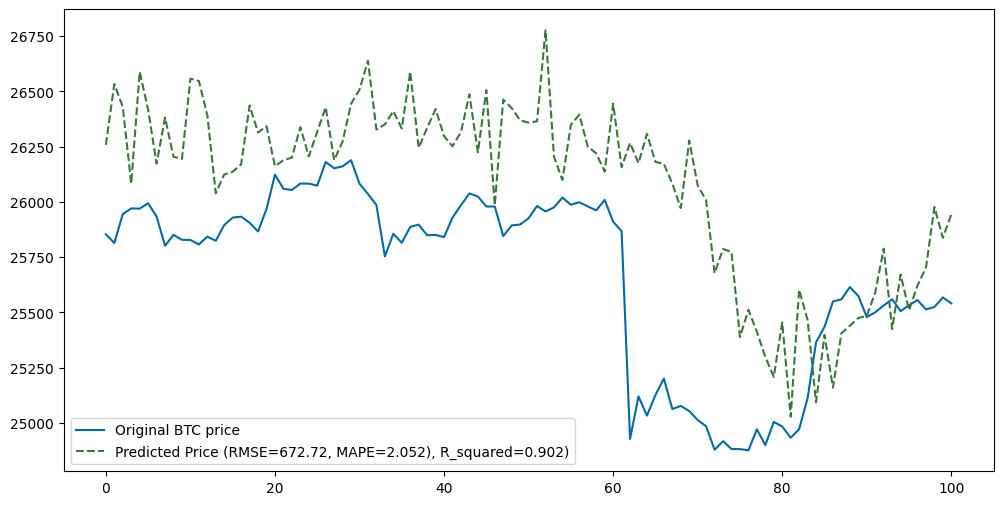

In [329]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(y_pred[0:101], linestyle='--', color='#3c763d',
         label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}), R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

##### Alternate method

In [458]:
# def generate_part(data, n_timesteps = 20, predict_steps = 5):
#     X = []
#     y = []
#     for i in range(len(data) - n_timesteps - predict_steps):
#         X.append(data[i:i + n_timesteps])
#         y.append(data[i:i + n_timesteps + predict_steps])
#     return np.array(X), np.array(y)

In [538]:
def generate_part(data, n_timesteps = 20, predict_steps = 5):
    X = []
    y = []
    for i in range(len(data) - n_timesteps - predict_steps):
        X.append(data[i:i + n_timesteps])
        y.append(data[i + n_timesteps + predict_steps])
    return np.array(X), np.array(y)

In [533]:
# # Create LSTM-based Generator model
# def build_generator():
#     model = tf.keras.Sequential([
#         layers.LSTM(time_steps, return_sequences = False, input_shape = (time_steps, 1)),
#         layers.Dense(time_steps + predict_steps),
#         layers.Reshape((time_steps + predict_steps, 1))
#     ])
#     model.compile(optimizer = Adam(), loss = 'mse')
#     return model

# # Create LSTM-based Discriminator model
# def build_discriminator():
#     model = tf.keras.Sequential([
#         layers.Dense(time_steps + predict_steps, input_shape=(time_steps + predict_steps, 1), activation = 'relu'),
#         layers.Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer = Adam(), loss = 'binary_crossentropy')
#     return model

# # def build_discriminator():
# #     model = tf.keras.Sequential([
# #         layers.LSTM(time_steps + predict_steps, return_sequences = False, input_shape=(time_steps + predict_steps, 1)),
# #         layers.Dense(1, activation='sigmoid')
# #     ])
# #     model.compile(optimizer = Adam(lr=0.0002, beta_1=0.5), loss = 'binary_crossentropy')
# #     return model

In [557]:
# Create LSTM-based Generator model
def build_generator():
    model = tf.keras.Sequential([
        layers.LSTM(time_steps, return_sequences = False, input_shape = (time_steps, 1)),
        layers.Dense(1, activation = 'relu'),
        layers.Reshape((1, 1))
    ])
    model.compile(optimizer = Adam(), loss = 'mse')
    return model

# Create LSTM-based Discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.LSTM(1, input_shape = (1, 1), return_sequences = False),
        layers.Dense(1, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
    ])
    model.compile(optimizer = Adam(), loss = 'binary_crossentropy')
    return model

In [558]:
# GAN model to combine generator and discriminator
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator weights while training the generator
    gan_input = layers.Input(shape = (time_steps,))
    gan_input_reshaped = layers.Reshape((time_steps, 1))(gan_input)
    
    generated_series = generator(gan_input_reshaped)

    #generated_series = layers.Reshape((time_steps + predict_steps, 1))(generated_series)
    
    gan_output = discriminator(generated_series)
    
    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(optimizer = 'adam', loss = 'binary_crossentropy')
    return gan

In [559]:
#Training method with training set, default epoch and default batch_size as arguments
from tqdm import tqdm

def train_gan(generator, discriminator, gan, x_train, y_train, epochs, batch_size):
    #initializing the GAN
    generator = build_generator()
    discriminator = build_discriminator()
    gan = build_gan(generator,discriminator)
    
    #training the model for specified epochs
    for epoch in range (1, epochs+1):
        print("###### @ Epoch", epoch)
        #tqdm module helps to generate a status bar for training
        #for _ in tqdm(range(batch_size)):
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_series = y_train[idx]

        # Concatenate x_train[idx] and noise_reshaped, both now 3D
        fake_series = generator.predict(x_train[idx])

        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_series, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_series, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        misleading_labels = np.ones((batch_size, 1))
        discriminator.trainable = False
        g_loss = gan.train_on_batch(x_train[idx], misleading_labels)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

In [560]:
def predict_future(generator, past_data):
    
    prediction = generator.predict(past_data)
    
    return np.array(prediction)

In [561]:
time_steps = 10
predict_steps = 1

x_train, y_train = generate_part(train_data, n_timesteps = time_steps, predict_steps = predict_steps)
x_test, y_test = generate_part(test_data, n_timesteps = time_steps, predict_steps = predict_steps)

In [562]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8250, 10, 1), (8250, 1), (489, 10, 1), (489, 1))

In [564]:
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

gan = build_gan(generator, discriminator)

train_gan(generator, discriminator, gan, x_train, y_train, epochs = 1000, batch_size = 16)

###### @ Epoch 1
1/1 [==============================] - 0s 323ms/step
###### @ Epoch 2
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 3
1/1 [==============================] - 0s 18ms/step
###### @ Epoch 4
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 5
1/1 [==============================] - 0s 21ms/step
###### @ Epoch 6
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 7
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 8
1/1 [==============================] - 0s 21ms/step
###### @ Epoch 9
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 10
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 11
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 12
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 13
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 14
1/1 [==============================] - 0s 18ms/step
###### @ Epoch 15
1/1 [=====

1/1 [==============================] - 0s 22ms/step
###### @ Epoch 231
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 232
1/1 [==============================] - 0s 21ms/step
###### @ Epoch 233
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 234
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 235
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 236
1/1 [==============================] - 0s 21ms/step
###### @ Epoch 237
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 238
1/1 [==============================] - 0s 22ms/step
###### @ Epoch 239
1/1 [==============================] - 0s 24ms/step
###### @ Epoch 240
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 241
1/1 [==============================] - 0s 23ms/step
###### @ Epoch 242
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 243
1/1 [==============================] - 0s 23ms/step
###### @ Epoch 244
1/1 [=

1/1 [==============================] - 0s 19ms/step
###### @ Epoch 459
1/1 [==============================] - 0s 18ms/step
###### @ Epoch 460
1/1 [==============================] - 0s 22ms/step
###### @ Epoch 461
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 462
1/1 [==============================] - 0s 21ms/step
###### @ Epoch 463
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 464
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 465
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 466
1/1 [==============================] - 0s 24ms/step
###### @ Epoch 467
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 468
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 469
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 470
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 471
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 472
1/1 [=

1/1 [==============================] - 0s 20ms/step
###### @ Epoch 687
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 688
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 689
1/1 [==============================] - 0s 25ms/step
###### @ Epoch 690
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 691
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 692
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 693
1/1 [==============================] - 0s 17ms/step
###### @ Epoch 694
1/1 [==============================] - 0s 21ms/step
###### @ Epoch 695
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 696
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 697
1/1 [==============================] - 0s 21ms/step
###### @ Epoch 698
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 699
1/1 [==============================] - 0s 20ms/step
###### @ Epoch 700
1/1 [=

1/1 [==============================] - 0s 20ms/step
###### @ Epoch 914
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 915
1/1 [==============================] - 0s 17ms/step
###### @ Epoch 916
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 917
1/1 [==============================] - 0s 19ms/step
###### @ Epoch 918
1/1 [==============================] - 0s 24ms/step
###### @ Epoch 919
1/1 [==============================] - 0s 23ms/step
###### @ Epoch 920
1/1 [==============================] - 0s 26ms/step
###### @ Epoch 921
1/1 [==============================] - 0s 25ms/step
###### @ Epoch 922
1/1 [==============================] - 0s 23ms/step
###### @ Epoch 923
1/1 [==============================] - 0s 28ms/step
###### @ Epoch 924
1/1 [==============================] - 0s 23ms/step
###### @ Epoch 925
1/1 [==============================] - 0s 22ms/step
###### @ Epoch 926
1/1 [==============================] - 0s 27ms/step
###### @ Epoch 927
1/1 [=

In [565]:
y_pred = predict_future(generator, x_test)

16/16 [==============================] - 0s 2ms/step


In [566]:
y_pred.shape, y_test.shape

((489, 1, 1), (489, 1))

In [567]:
y_pred = scaler_gan.inverse_transform(y_pred.reshape(y_pred.shape[0], y_pred.shape[1]))
y_test_original = scaler_gan.inverse_transform(y_test.reshape(-1,1))

In [568]:
y_pred.shape, y_test.shape

((489, 1), (489, 1))

In [569]:
rmse_error = rmse(y_test_original, y_pred)
mape_error = MAPE(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

In [570]:
rmse_error, mape_error, r2

(6941.005198525981, array([22.93575899]), -9.184279093566944)

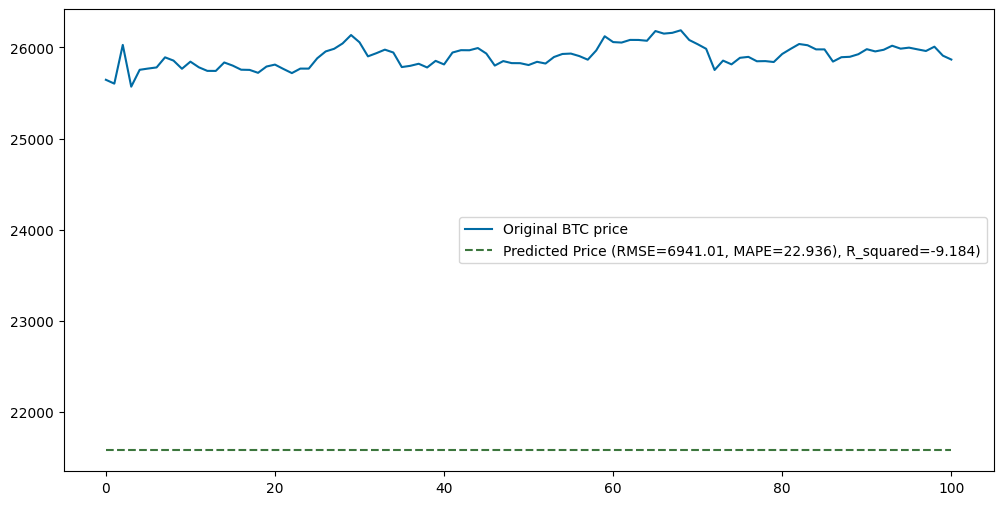

In [571]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(y_pred[0:101], linestyle='--', color='#3c763d',
         label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}), R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");